# TUTORIAL 3 : Evolute of curves

The evolute of a curve is by definition the set of its centers of curvatures. The goal of this lab session is to define a generic function that computes the evolute of any parameterized curve. 

## PART I. 
We assume in the following that we have a parametrized curve $f:[a,b]\to\mathbb{R}^3$ which is only known through a discretization $(t,f)$ where $$\textit{t = np.linspace(0,1,n)}\quad f=(f(t_0),\cdots,f(t_{n-1})).$$
$f$ is therefore of size $3 \times n$.

## 1) Discrete derivative
Define a function that calculate an approximation of the derivative of $f$. The output has the same size than $t$ and $f$. 

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#----------------------
# discrete derivature
def derivative(t,f):
    deriv_f = np.zeros(f.shape)
    n = len(t)
    
    h = t[0] - t[1]
    
    #calculates the discrete derivative for 
    for i in range(n-1):
        deriv_f[:,i] = (f[:,i]-f[:,i+1]) / h
    # last 
    deriv_f[:,n-1] = (f[:, n-3] - 4*f[:,n-2]+3*f[:,n-1]) / (2*(-h))
    
    return deriv_f

#---------------------
# check that function on simple examples

t = np.linspace(0,1,5)
f = lambda x : 2*x
F = np.array([f(t), f(t), f(t)])
F = np.array([np.cos(t), np.sin(t), t])
print(F)
print(derivative(t, F))


[[1.         0.96891242 0.87758256 0.73168887 0.54030231]
 [0.         0.24740396 0.47942554 0.68163876 0.84147098]
 [0.         0.25       0.5        0.75       1.        ]]
[[-0.12435031 -0.36531944 -0.58357477 -0.76554625 -0.85653199]
 [ 0.98961584  0.92808632  0.80885289  0.6393289   0.55456691]
 [ 1.          1.          1.          1.          1.        ]]


## 2) Discrete normal vector
The goal is to build the function that outputs for every $t_i$ the unit normal $N(t_i)$.

In [56]:
#----------------------
# discrete derivature
def normal_vector(t,f):
    n = len(t)
    
    tangent_f = np.zeros(f.shape)
    df = derivative(t,f)
    for i in range(n) :
        tangent_f[:,i] = df[:,i] / np.linalg.norm(df[:,i],2)
    normal_f = derivative(t, tangent_f)
    
    for i in range(n) :
        if np.linalg.norm(normal_f[:,i], 2) :
            normal_f[:,i] = normal_f[:,i] / np.linalg.norm(normal_f[:,i], 2)
            
    return normal_f # normal_f is of size 3 x n

#---------------------
# check that function on simple examples
t = np.linspace(0,1,5)
F = np.array([np.cos(t), np.sin(t), t])

print(F)
print(normal_vector(t, F))

[[1.         0.96891242 0.87758256 0.73168887 0.54030231]
 [0.         0.24740396 0.47942554 0.68163876 0.84147098]
 [0.         0.25       0.5        0.75       1.        ]]
[[-0.96891242 -0.87758256 -0.73168887 -0.66246782 -0.49112041]
 [-0.24740396 -0.47942554 -0.68163876 -0.74326452 -0.82711964]
 [-0.         -0.         -0.         -0.09324288 -0.27326516]]


## 3) Curvature function
The goal is to build the function that outputs for every $t_i$ the curvature $k(t_i)$.

In [91]:
#----------------------
# discrete derivature
def curvature(t, f):

    n = len(t)
    # calculating the derivatives
    d1_f = derivative(t,f)
    d2_f = derivative(t,d1_f)
    
    wedge = np.cross(d1_f.T, d2_f.T).T
    
    # wedge product norm 
    wedge_norm = np.linalg.norm( wedge, ord=2, axis=0)

    # norm of the first derivative cubed
    norm_d1_f_cubed = np.linalg.norm(d1_f, ord=2, axis=0)**3

    if f.shape[0] == 3 :
        curvature_f = wedge_norm / norm_d1_f_cubed
    elif f.shape[0] == 2:
        curvature_f = wedge / norm_d1_f_cubed
        
    return curvature_f

#---------------------
# check that function on simple examples



## 4) Evolute 
Define the evolute, namely the set of centers of curvatures. 

In [42]:
def evolute(t,f):
    normal_f = normal_vector(t, f)
    k_f = curvature(t, f)

    evolute_f = f + (1/k_f) * normal_f
    
    return evolute_f


## PART II. 1) Evolute of the helicoid
Plot the evolute of the helicoid 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^3\\ 
&t &\mapsto & (R\cos t, R \sin t, at).
\end{array}
$$

Text(0.5, 0.92, 'The Helicoid and its evolute')

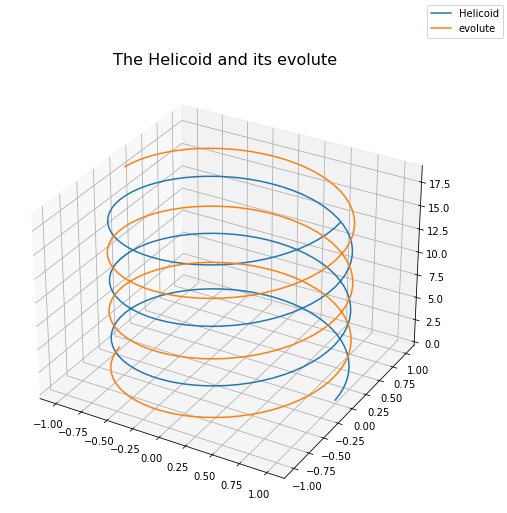

In [92]:
# definition of the parameters
R = 1
a = 1

fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(projection='3d')

t = np.linspace(0,6*np.pi, 200)

x = R * np.cos(t)
y = R * np.sin(t)
z = a * t

gamma_evolute = evolute(t, np.array([x,y,z]))

cx = gamma_evolute[0, :-2]
cy = gamma_evolute[1, :-2]
cz = gamma_evolute[2, :-2]

ax.plot(x, y, z, label="Helicoid")
ax.plot(cx, cy, cz, label="evolute")
fig.legend()

ax.set_title("The Helicoid and its evolute", fontsize=16)


## 2) Evolute of the catenary
Plot the evolute of the catenary 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^2\\ 
&t &\mapsto & (t,\cosh t).
\end{array}
$$

(0.0, 3.5)

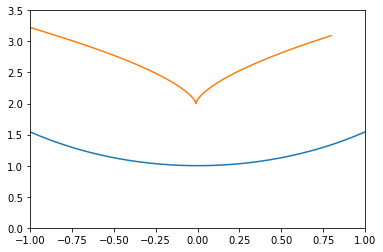

In [97]:
t = np.linspace(-1, 1, 200)
f = lambda x : np.cosh(t)

F = np.array([t, f(t)])

gamma_evolute = evolute(t, F)

plt.plot(t, f(t))
plt.plot(gamma_evolute[0], gamma_evolute[1])

plt.xlim(-1,1)
plt.ylim(0, 3.5)

## 3) Evolute of Bezier curves
Plot the evolute of  Bezier curve that you created before.